# Classifying Fashion-MNIST

I will be using the [Fashion-MNIST dataset] (https://github.com/zalandoresearch/fashion-mnist) as a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It is more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you will use in the real world.

<img src="https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/assets/fashion-mnist-sprite.png" width=500px>

In this notebook, you will build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you would not be learning. It is important to write the code yourself and get it to work. Feel free to consult previous notebooks as you work through this.

First off, let's load the dataset through torchvision.

In [9]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True,
                                 train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True,
                                train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

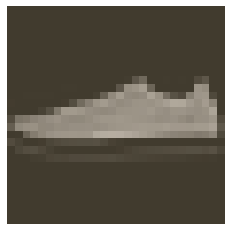

In [10]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [22]:
# TODO: Define your network architecture here
from torch.nn import Sequential
from torch import nn

input_size = 28*28
output_size = 10
hidden_sizes = [512, 256, 128, 64, 32]

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], hidden_sizes[4]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[4], output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=32, bias=True)
  (9): ReLU()
  (10): Linear(in_features=32, out_features=10, bias=True)
  (11): LogSoftmax(dim=1)
)


## Train the network

Now you should create your network and train it. First you will want to define the [criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc.), you should be able to get the training loss below 0.4

In [23]:
# TODO: Create the network, define the criterion and optimizer

from torch import optim

learning_rate = 0.003

# Define criterion
criterion = nn.NLLLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
# TODO: Train the network here

epochs = 10

for e in range(epochs):

  running_loss = 0.0

  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)

    # Zero out the gradients
    optimizer.zero_grad()

    # Make forward pass through the network to get the logits
    outputs = model.forward(images)

    # Use logits to calculate the loss
    loss = criterion(outputs, labels)

    # Perform backward pass to calculate the gradients
    loss.backward()

    # Take a step with the optimizer to update the weights
    optimizer.step()

    running_loss += loss.item()

  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5890761893441174
Training loss: 0.4117256450627658
Training loss: 0.3688215445290242
Training loss: 0.3478272747256354
Training loss: 0.32952143771371356
Training loss: 0.3121341039249892
Training loss: 0.30712849863651975
Training loss: 0.29186095296542275
Training loss: 0.2816994814857491
Training loss: 0.27179402253155643


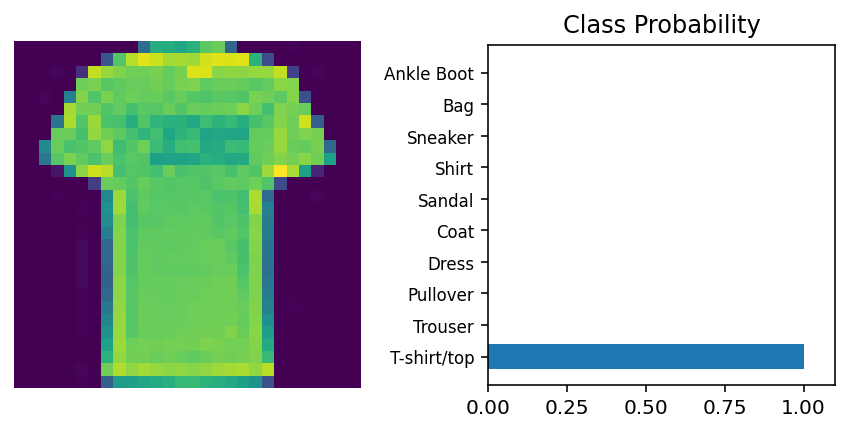

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')